In [1]:
#import libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import lognorm, norm, beta
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# input parameters 

#Area=  #Distribution Type=LOG_NORMAL Mean: 810 acres Std. Dev: 0.21
#Thickness= #Distribution Type=LOG_NORMAL Mean: 80 ft Std. Dev: 0.15
#Porosity=  #Distribution Type=NORMAL Mean: 0.22 Std. Dev: 0.0271
#So=    #Distribution Type=BETA Alpha : 0.151 Beta : 0.071 lower bound: 0.35 upper bound: 0.82
#oil_FVF=#  Distribution Type=constant 1.22 rb/stb
#Recovery_Factor=   #Distribution Type=NORMAL Mean: 23% St. Dev.: 6.25%


In [3]:
# Area 
Area = np.random.lognormal(np.log(810),0.21,1000)
print(f"Area={Area[:5]}")

#Thickness
Thickness= np.random.lognormal(np.log(80),0.15,1000)
print(f"Thickness={Thickness[:5]}")

#Porosity
Porosity=np.random.normal(0.22,0.0271,1000)
print(f"Porosity={Porosity[:5]}")

#So
def beta_distribution_with_bounds(size, alpha, beta, lower_bound, upper_bound):
    # Generate random numbers from standard beta distribution
    standard_beta = np.random.beta(alpha, beta, size)

    # Transform to the desired range [lower_bound, upper_bound]
    result= lower_bound + (upper_bound - lower_bound) * standard_beta
    return result

So=beta_distribution_with_bounds(1000,0.151,0.071,0.35,0.82)
print(f"So={So[:5]}")

#oil_FVF
Oil_FVF = np.full(1000, 3.2)
print(f"Oil_FVF={Oil_FVF[:5]}")

#Recovery_Factor
Recovery_Factor=np.random.normal(0.23,0.0625,1000)
print(f"Recovery_Factor={Recovery_Factor[:5]}")

Area=[808.79284768 838.08336891 874.10674438 796.66320394 778.40355239]
Thickness=[94.93236347 82.66473307 72.13240471 94.57862222 74.68283726]
Porosity=[0.24534436 0.2181126  0.25902563 0.25995773 0.24591426]
So=[0.81999954 0.81752549 0.66563868 0.81982937 0.82      ]
Oil_FVF=[3.2 3.2 3.2 3.2 3.2]
Recovery_Factor=[0.20297258 0.21847443 0.27628507 0.31038478 0.16485075]


In [4]:
#Resources and Reserve 
Resources=(7758*Area*Thickness*Porosity*So)/Oil_FVF
print(f"Resources={Resources[:5]}")

Reserve=Resources*Recovery_Factor
print(f"Reserve={Reserve[:5]}")


Resources=[37449073.15329966 29949484.049751   26355785.8324286  38930836.86189652
 28419928.74843166]
Reserve=[ 7601135.14093392  6543196.48783531  7281710.24401807 12083539.1005068
  4685046.66983614]


In [5]:
data = {
    'Area': Area,
    'Thickness': Thickness,
    'Porosity': Porosity,
    'So': So,
    'Oil_FVF': Oil_FVF,
    'Recovery_Factor': Recovery_Factor,
    'Resources': Resources,
    'Reserve': Reserve
}

Data_frame = pd.DataFrame(data)
Data_frame

,Area,Thickness,Porosity,So,Oil_FVF,Recovery_Factor,Resources,Reserve
0,808.792848,94.932363,0.245344,0.820000,3.2,0.202973,3.744907e+07,7.601135e+06
1,838.083369,82.664733,0.218113,0.817525,3.2,0.218474,2.994948e+07,6.543196e+06
2,874.106744,72.132405,0.259026,0.665639,3.2,0.276285,2.635579e+07,7.281710e+06
3,796.663204,94.578622,0.259958,0.819829,3.2,0.310385,3.893084e+07,1.208354e+07
4,778.403552,74.682837,0.245914,0.820000,3.2,0.164851,2.841993e+07,4.685047e+06
...,...,...,...,...,...,...,...,...
995,831.573269,91.028148,0.252646,0.820000,3.2,0.334014,3.801921e+07,1.269895e+07
996,896.334211,81.377922,0.254069,0.352364,3.2,0.350394,1.583143e+07,5.547241e+06
997,704.712757,85.421850,0.240037,0.818984,3.2,0.324688,2.869023e+07,9.315383e+06
998,698.126755,64.254079,0.190591,0.820000,3.2,0.191520,1.699621e+07,3.255112e+06


In [6]:
# Find the minimum values for the entire DataFrame
min_values_df = Data_frame.min()

# Find the minimum values for specific columns
min_values_area = Data_frame['Area'].min()
min_values_thickness = Data_frame['Thickness'].min()

# Print the results
print("Minimum values for the entire DataFrame:")
print(min_values_df)
#convert results to numpy array 
min_df_array=np.array(min_values_df)
min_df_array


Minimum values for the entire DataFrame:
Area               3.958653e+02
Thickness          4.986746e+01
Porosity           1.379748e-01
So                 3.500000e-01
Oil_FVF            3.200000e+00
Recovery_Factor   -1.358830e-02
Resources          6.456757e+06
Reserve           -4.246939e+05
dtype: float64


array([ 3.95865284e+02,  4.98674555e+01,  1.37974783e-01,  3.50000000e-01,
        3.20000000e+00, -1.35882955e-02,  6.45675710e+06, -4.24693885e+05])

In [7]:
# Find the Maximum values for the entire DataFrame
max_values_df = Data_frame.max()

# Find the minimum values for specific columns
max_values_area = Data_frame['Area'].max()
max_values_thickness = Data_frame['Thickness'].max()

# Print the results
print("Maximum values for the entire DataFrame:")
print(max_values_df)
#convert results to numpy array 
max_df_array=np.array(max_values_df)
max_df_array


Maximum values for the entire DataFrame:
Area               1.634385e+03
Thickness          1.465864e+02
Porosity           3.053755e-01
So                 8.200000e-01
Oil_FVF            3.200000e+00
Recovery_Factor    4.068243e-01
Resources          7.094492e+07
Reserve            2.076104e+07
dtype: float64


array([1.63438535e+03, 1.46586377e+02, 3.05375487e-01, 8.20000000e-01,
       3.20000000e+00, 4.06824346e-01, 7.09449183e+07, 2.07610439e+07])

In [8]:

# Specify parameters
max_Reserve = Data_frame['Reserve'].max()
min_Reserve = Data_frame['Reserve'].min()
number_bins = 100
Increment = (max_Reserve - min_Reserve) / number_bins

# Create frequency distribution using numpy.histogram
hist, bin_edges = np.histogram(Data_frame['Reserve'], bins=np.arange(min_Reserve, max_Reserve + Increment, Increment))

# Print the results
print("Frequency Distribution:")
print(hist)
print("\nBin Edges:")
print(bin_edges)

Frequency Distribution:
[ 1  0  0  0  0  0  1 10  8 21 13 21 32 24 34 19 33 29 29 24 31 35 25 33
 42 29 30 29 20 31 27 24 20 30 26 17 26 22 17 16 10 15 17 11  9 14 12  9
  6  9  4  2  7  3  4  7  4  4  1  4  2  5  0  1  1  1  1  0  1  1  0  0
  1  1  0  0  0  1  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1]

Bin Edges:
[-4.24693885e+05 -2.12836507e+05 -9.79128270e+02  2.10878250e+05
  4.22735628e+05  6.34593007e+05  8.46450385e+05  1.05830776e+06
  1.27016514e+06  1.48202252e+06  1.69387990e+06  1.90573728e+06
  2.11759465e+06  2.32945203e+06  2.54130941e+06  2.75316679e+06
  2.96502417e+06  3.17688155e+06  3.38873892e+06  3.60059630e+06
  3.81245368e+06  4.02431106e+06  4.23616844e+06  4.44802582e+06
  4.65988319e+06  4.87174057e+06  5.08359795e+06  5.29545533e+06
  5.50731271e+06  5.71917009e+06  5.93102746e+06  6.14288484e+06
  6.35474222e+06  6.56659960e+06  6.77845698e+06  6.99031435e+06
  7.20217173e+06  7.41402911e+06  7.62588649e+06  7.83774387e+06
  8.0496

In [9]:
# Calculate cumulative frequency
cumulative_freq = np.cumsum(hist)
CDF=cumulative_freq/1000
_1CDF=1-CDF
_1CDF

array([0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.998, 0.988, 0.98 ,
       0.959, 0.946, 0.925, 0.893, 0.869, 0.835, 0.816, 0.783, 0.754,
       0.725, 0.701, 0.67 , 0.635, 0.61 , 0.577, 0.535, 0.506, 0.476,
       0.447, 0.427, 0.396, 0.369, 0.345, 0.325, 0.295, 0.269, 0.252,
       0.226, 0.204, 0.187, 0.171, 0.161, 0.146, 0.129, 0.118, 0.109,
       0.095, 0.083, 0.074, 0.068, 0.059, 0.055, 0.053, 0.046, 0.043,
       0.039, 0.032, 0.028, 0.024, 0.023, 0.019, 0.017, 0.012, 0.012,
       0.011, 0.01 , 0.009, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006,
       0.005, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.   ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


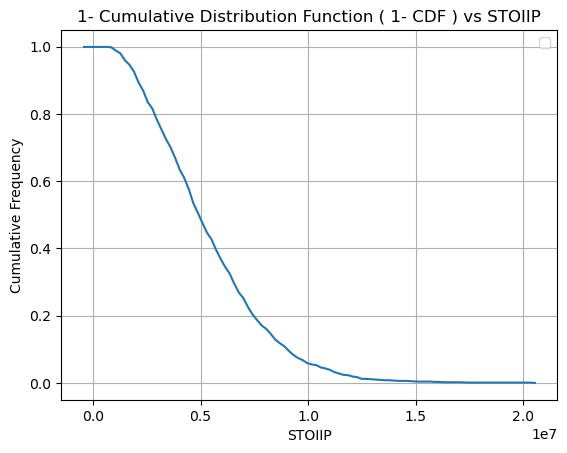

In [10]:
plt.plot(bin_edges[:-1], _1CDF, label='_1CDF')
plt.xlabel('STOIIP')
plt.ylabel('Cumulative Frequency')
plt.title('1- Cumulative Distribution Function ( 1- CDF ) vs STOIIP')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


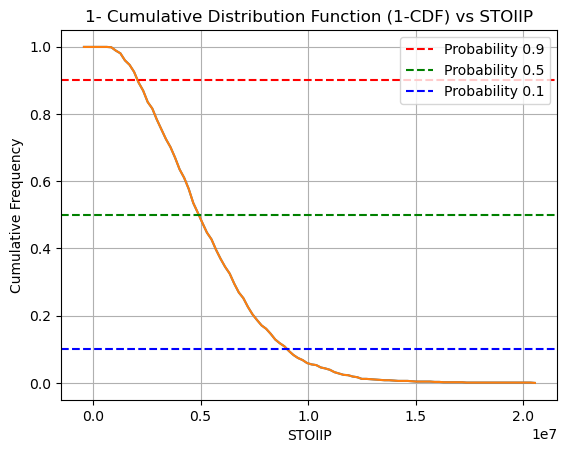

In [11]:
plt.plot(bin_edges[:-1], _1CDF, label='_1CDF')

# Your existing code
plt.plot(bin_edges[:-1], _1CDF, label='_1CDF')
plt.xlabel('STOIIP')
plt.ylabel('Cumulative Frequency')
plt.title('1- Cumulative Distribution Function (1-CDF) vs STOIIP')
plt.legend()
plt.grid(True)

# Adding horizontal lines for probabilities 0.9, 0.5, and 0.1
plt.axhline(0.9, color='r', linestyle='--', label='Probability 0.9')
plt.axhline(0.5, color='g', linestyle='--', label='Probability 0.5')
plt.axhline(0.1, color='b', linestyle='--', label='Probability 0.1')

plt.legend()

# Display the plot
plt.show()

In [12]:


# Create a figure using plotly
fig = go.Figure()

# Plot the _1CDF line
fig.add_trace(go.Scatter(x=bin_edges[:-1], y=_1CDF, mode='lines', name='1-CDF vs STOIIP'))

# Adding horizontal lines for probabilities 0.9, 0.5, and 0.1
fig.add_shape(dict(type="line", x0=min(bin_edges[:-1]), x1=max(bin_edges[:-1]), y0=0.9, y1=0.9, line=dict(color="red", dash="dash"), name='Probability 0.9'))
fig.add_shape(dict(type="line", x0=min(bin_edges[:-1]), x1=max(bin_edges[:-1]), y0=0.5, y1=0.5, line=dict(color="green", dash="dash"), name='Probability 0.5'))
fig.add_shape(dict(type="line", x0=min(bin_edges[:-1]), x1=max(bin_edges[:-1]), y0=0.1, y1=0.1, line=dict(color="blue", dash="dash"), name='Probability 0.1'))

# Update layout
fig.update_layout(
    xaxis=dict(title='STOIIP'),
    yaxis=dict(title='Cumulative Frequency'),
    title='1- Cumulative Distribution Function (1-CDF) vs STOIIP',
    showlegend=True,
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
)

# Show the interactive plot
fig.show()